### Introduction to Simple and Linear Regression in Machine Learning

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('temp.csv', sep=',')

In [5]:
df

,weight,height
0,55,160
1,62,170
2,70,175
3,58,165
4,80,180
5,65,172
6,77,178
7,60,168
8,85,185
9,72,176


In [8]:
df.head()

,weight,height
0,55,160
1,62,170
2,70,175
3,58,165
4,80,180


Text(0, 0.5, 'Height')

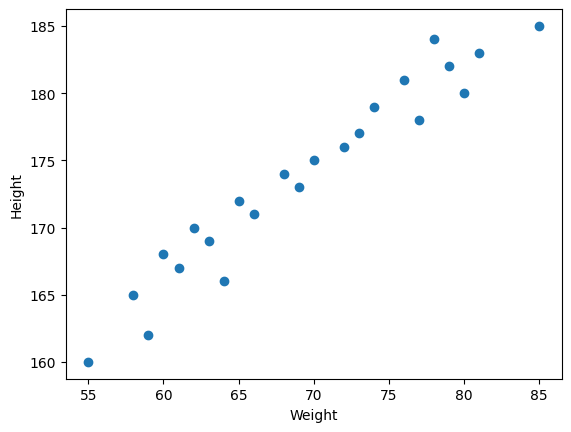

In [12]:
# Scatter plot
plt.scatter(df['weight'],df['height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [13]:
# correlation
df.corr()

,weight,height
weight,1.000000,0.968805
height,0.968805,1.000000


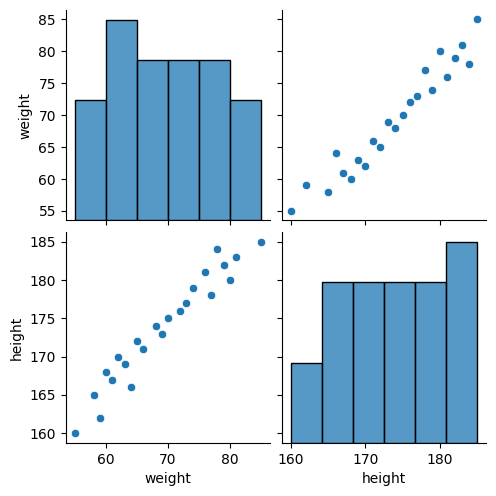

In [14]:
# seaborn for visualization
import seaborn as sns

sns.pairplot(df)

In [28]:
# Independent features are presented in 2d format like [[]]
x=df[['weight']]
x
x_train=df['weight']
# dependent features are presented in 1d format like []
y=df['height']
y

0     160
1     170
2     175
3     165
4     180
5     172
6     178
7     168
8     185
9     176
10    174
11    179
12    162
13    169
14    182
15    171
16    177
17    167
18    183
19    173
20    181
21    166
22    184
Name: height, dtype: int64

In [24]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [26]:
print(np.shape(x))
print(np.shape(y))

(23, 1)
(23,)


In [31]:
# Train test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [33]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(17, 1)
(17,)
(6, 1)
(6,)


In [37]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(np.array(x_train).reshape(-1,1))
x_test=scaler.transform(np.array(x_test).reshape(-1,1))
# y_train=np.array(y_train).reshape(-1,1)
# y_test=np.array(y_test).reshape(-1,1)
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))
x_train

(17, 1)
(17, 1)
(6, 1)
(6, 1)


array([[-1.1585881 ],
       [-1.02085385],
       [-0.74538535],
       [-0.0567141 ],
       [ 0.49422289],
       [ 0.76969139],
       [-1.70952509],
       [ 1.32062839],
       [ 1.45836264],
       [ 0.35648864],
       [-0.8831196 ],
       [ 1.04515989],
       [-1.43405659],
       [-0.3321826 ],
       [ 1.18289414],
       [-0.19444835],
       [ 0.90742564]])

In [38]:
x_test

array([[-0.6076511 ],
       [ 0.2187544 ],
       [-2.12272784],
       [ 2.00929963],
       [-1.29632234],
       [-1.57179084]])

In [41]:
# Apply simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)



In [42]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [46]:
print("coefficient i.e. slope (1 unit value change in x ---> y changes by)",regression.coef_)

coefficient i.e. slope (1 unit value change in x ---> y changes by) [[5.64376809]]


In [47]:
print("Intercept (value of y when x=0)",regression.intercept_)

Intercept (value of y when x=0) [175.05882353]


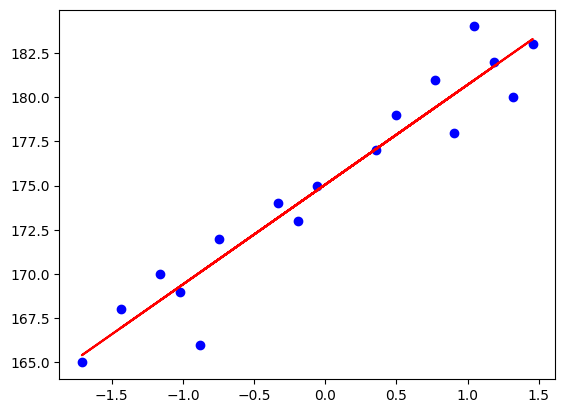

In [48]:
# Plot trainning data and regression line
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,regression.predict(x_train),color='red')

In [49]:
# Prediction for test data
y_prediction=regression.predict(x_test)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
mse=mean_squared_error(y_test,y_prediction)
mae=mean_absolute_error(y_test,y_prediction)
rmse=np.sqrt(mse)

In [55]:
print(mse)
print(mae)
print(rmse)

5.001321887274389
1.7218283663734628
2.236363540946415


In [ ]:
# This is accuracy score for regression
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_prediction)
print(r2)

0.9309898091445465


In [58]:
%pip install statsmodels

# OLS Linear Regression
import statsmodels.api as sm    
x_train_sm=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train_sm).fit()
model.summary()


^C
Note: you may need to restart the kernel to use updated packages.


f:\Courses\DS,ML,DL,NLP\CODE\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     171.2
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.32e-09
Time:                        15:14:54   Log-Likelihood:                -32.848
No. Observations:                  17   AIC:                             69.70
Df Residuals:                      15   BIC:                             71.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.0588      0.431    405.800      0.000     174.139     175.978
x1             5.6438      0.431     13.083      0.000       4.724       6.563
==============================================================================
Omnibus:                        2.987   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                1.424
Skew:                          -0.689   Prob(JB):                        0.491
Kurtosis:                       3.330   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.6 MB 10.7 MB/s eta 0:00:01
   -------------- ------------------------- 3.4/9.6 MB 11.2 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 8.6 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 8.2 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 7.5 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.6 MB 7.2 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.6 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 5.8 MB/s eta 0:00:00


In [63]:
# Prediction on diffrent data
narendra=regression.predict(scaler.transform([[76]]))


In [64]:
print(narendra)

[[603.9851984]]


In [65]:
yukta=regression.predict(scaler.transform([[48]]))
yukta

array([[445.95969187]])